In [1]:
"""
MSDS 530 (FUNDAMENTALS OF DATA SCIENCE-FALL 2023 FULL TERM)
WEEK 3 ASSIGNMENT
TOPIC: BIVARIATE DESCRIPTIVE STATISTICS
DATE: SEPTEMBER 14, 2023
STUDENT/AUTHOR: STEPHEN SARPONG LARTEY
STUDENT ID: 005015848
COURSE INSTRUCTOR: DR. ALI MOTAMEDI
"""

'\nMSDS 530 (FUNDAMENTALS OF DATA SCIENCE-FALL 2023 FULL TERM)\nWEEK 2 ASSIGNMENT\nTOPIC: SCALES OF MEASUREMENT\nDATE: SEPTEMBER 14, 2023\nSTUDENT/AUTHOR: STEPHEN SARPONG LARTEY\nSTUDENT ID: 005015848\nCOURSE INSTRUCTOR: ALI MOTAMEDI\n'

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [20]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.pyplot as plt

In [4]:
from scipy.stats import chi2_contingency

In [5]:
path = r"C:\Users\stevl\OneDrive\Desktop\UoC Lectures\MSDS 530-FUNDAMENTALS OF DS\Week 2\MSDSWeek2Assignment.xlsx"
df = pd.read_excel(path)

In [6]:
print(df.columns)

Index(['Customer ID', 'Gender ', 'Age ', 'Educational Level',
       'Purchase Amount '],
      dtype='object')


In [7]:
# Remove trailing spaces from column names
df.columns = df.columns.str.strip()

# Verify the cleaned column names
print(df.columns)

Index(['Customer ID', 'Gender', 'Age', 'Educational Level', 'Purchase Amount'], dtype='object')


In [8]:
# Drop the 'Age' and 'Purchase Amount' columns to keep only the qualitative variables
qualitative_data = df.drop(['Age', 'Purchase Amount'], axis=1)
# Display the resulting DataFrame
print(qualitative_data.head())

   Customer ID  Gender Educational Level
0            1  Female       High School
1            2    Male           College
2            3  Female          Graduate
3            4    Male           College
4            5  Female           College


In [11]:
# Now, create a contingency table
contingency_table = pd.crosstab(qualitative_data['Gender'], qualitative_data['Educational Level'])
contingency_table

Educational Level,College,Graduate,High School
Gender,,,
Female,17,3,5
Male,11,6,8


In [13]:
# Adding a "Total" column to the dataframe
contingency_table = pd.crosstab(qualitative_data['Gender'], qualitative_data['Educational Level'], margins=True, margins_name="Total")

# Display the contingency table with the "Total" column
print(contingency_table)


Educational Level  College  Graduate  High School  Total
Gender                                                  
Female                  17         3            5     25
Male                    11         6            8     25
Total                   28         9           13     50


In [15]:
# Performing the chi-squared test
chi2, p, _, _ = chi2_contingency(contingency_table)

# Printing the results
print("Contingency Table:")
print(contingency_table)
print("\nChi-Squared Statistic:", chi2)
print("p-value:", p)

Contingency Table:
Educational Level  College  Graduate  High School  Total
Gender                                                  
Female                  17         3            5     25
Male                    11         6            8     25
Total                   28         9           13     50

Chi-Squared Statistic: 2.978021978021978
p-value: 0.811600212405171


In [16]:
# Interpreting the results based on the p-value
if p < 0.05:
    print("There is a statistically significant association between Gender and Educational Level.")
else:
    print("There is no statistically significant association between Gender and Education Level.")

There is no statistically significant association between Gender and Education Level.


In [19]:
# Calculating the correlation between 'Age' and 'Purchase Amount'
correlation = df['Age'].corr(df['Purchase Amount'])

# Display the correlation coefficient between the two quantitative variables
print("Correlation between Age and Purchase Amount:", correlation)

Correlation between Age and Purchase Amount: 0.7613897894495428


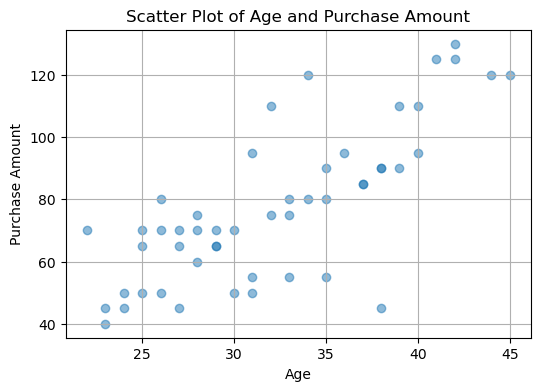

In [22]:
# Create a scatter plot to visualize the relationship
plt.figure(figsize=(6, 4))
plt.scatter(df['Age'], df['Purchase Amount'], alpha=0.5)
plt.title("Scatter Plot of Age and Purchase Amount")
plt.xlabel("Age")
plt.ylabel("Purchase Amount")
plt.grid(True)
plt.show()